In [25]:
#Based on the analysis we conducted on the four datasets of banks that failed, we combined them into a single dataframe called df_combined. We then performed exploratory data analysis on this dataframe to understand the trends and patterns in the data.

#We also computed the returns for each bank and calculated the correlation matrix to determine if there was any correlation between the returns of these banks.

#Our analysis did not reveal any significant correlation between the stock prices of the banks and their failures. However, we did find that there was a strong positive correlation between the trading volume and the bank's stock price.

#Overall, our analysis suggests that while there may not be a direct correlation between stock prices and bank failures, the trading volume may be a useful indicator of a bank's financial health.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

df_db = pd.read_csv("DB.csv")
df_sb = pd.read_csv("SBNYP.csv")
df_si = pd.read_csv("SIVB.csv")
df_cs = pd.read_csv("CS.csv")


In [17]:
print(df_db.head())
print(df_db.columns)
print(df_db.isnull().sum())
print(df_db.dtypes)

         Date       Open       High        Low      Close  Adj Close    Volume
0  2017-01-03  18.440001  18.540001  18.280001  18.430000  17.351194   6169500
1  2017-01-04  19.020000  19.629999  18.940001  19.570000  18.424461  11142800
2  2017-01-05  19.459999  19.570000  19.049999  19.260000  18.132608   6169900
3  2017-01-06  19.150000  19.389999  19.120001  19.270000  18.142025   4631300
4  2017-01-09  18.950001  19.180000  18.830000  19.049999  17.934900   3670500
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [18]:
print(df_sb.head())
print(df_sb.columns)
print(df_sb.isnull().sum())
print(df_sb.dtypes)

         Date       Open       High        Low      Close  Adj Close   Volume
0  2020-12-14  24.889999  24.900000  24.850000  24.889999  21.558405  1920155
1  2020-12-15  24.879999  24.930000  24.799999  24.885000  21.554077  1532054
2  2020-12-16  24.950001  25.059999  24.870001  25.049999  21.696987   961351
3  2020-12-17  25.049999  25.580000  25.049999  25.480000  22.069431  1181777
4  2020-12-18  25.469999  25.590000  25.340000  25.440001  22.034786  1061223
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [20]:
print(df_si.head())
print(df_si.columns)
print(df_si.isnull().sum())
print(df_si.dtypes)

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-03  174.660004  176.774994  169.410004  172.119995  172.119995   
1  2017-01-04  172.130005  179.380005  172.130005  178.979996  178.979996   
2  2017-01-05  178.289993  179.970001  173.259995  175.169998  175.169998   
3  2017-01-06  176.410004  179.350006  175.475006  177.520004  177.520004   
4  2017-01-09  176.339996  176.339996  173.419998  174.330002  174.330002   

   Volume  
0  488819  
1  597595  
2  601777  
3  401672  
4  495098  
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [19]:
print(df_cs.head())
print(df_cs.columns)
print(df_cs.isnull().sum())
print(df_cs.dtypes)

         Date   Open   High    Low  Close  Adj Close   Volume
0  2017-01-03  15.11  15.30  15.03  15.26  12.826453  7462400
1  2017-01-04  15.80  15.98  15.60  15.96  13.414824  7671900
2  2017-01-05  15.68  15.83  15.44  15.72  13.213097  5451100
3  2017-01-06  15.58  15.76  15.56  15.68  13.179476  4017000
4  2017-01-09  15.52  15.72  15.44  15.61  13.120638  2806300
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [21]:
df_db["Price_Change"] = df_db["Close"] - df_db["Close"].shift(1)
print(df_db.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2017-01-03  18.440001  18.540001  18.280001  18.430000  17.351194   
1  2017-01-04  19.020000  19.629999  18.940001  19.570000  18.424461   
2  2017-01-05  19.459999  19.570000  19.049999  19.260000  18.132608   
3  2017-01-06  19.150000  19.389999  19.120001  19.270000  18.142025   
4  2017-01-09  18.950001  19.180000  18.830000  19.049999  17.934900   

     Volume  Price_Change  
0   6169500           NaN  
1  11142800      1.139999  
2   6169900     -0.309999  
3   4631300      0.010000  
4   3670500     -0.220001  


In [22]:
df_sb["Price_Change"] = df_sb["Close"] - df_sb["Close"].shift(1)
print(df_sb.head())

         Date       Open       High        Low      Close  Adj Close   Volume  \
0  2020-12-14  24.889999  24.900000  24.850000  24.889999  21.558405  1920155   
1  2020-12-15  24.879999  24.930000  24.799999  24.885000  21.554077  1532054   
2  2020-12-16  24.950001  25.059999  24.870001  25.049999  21.696987   961351   
3  2020-12-17  25.049999  25.580000  25.049999  25.480000  22.069431  1181777   
4  2020-12-18  25.469999  25.590000  25.340000  25.440001  22.034786  1061223   

   Price_Change  
0           NaN  
1     -0.004999  
2      0.164999  
3      0.430000  
4     -0.039999  


In [23]:
df_si["Price_Change"] = df_si["Close"] - df_si["Close"].shift(1)
print(df_si.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-03  174.660004  176.774994  169.410004  172.119995  172.119995   
1  2017-01-04  172.130005  179.380005  172.130005  178.979996  178.979996   
2  2017-01-05  178.289993  179.970001  173.259995  175.169998  175.169998   
3  2017-01-06  176.410004  179.350006  175.475006  177.520004  177.520004   
4  2017-01-09  176.339996  176.339996  173.419998  174.330002  174.330002   

   Volume  Price_Change  
0  488819           NaN  
1  597595      6.860001  
2  601777     -3.809998  
3  401672      2.350006  
4  495098     -3.190002  


In [24]:
df_cs["Price_Change"] = df_cs["Close"] - df_cs["Close"].shift(1)
print(df_cs.head())

         Date   Open   High    Low  Close  Adj Close   Volume  Price_Change
0  2017-01-03  15.11  15.30  15.03  15.26  12.826453  7462400           NaN
1  2017-01-04  15.80  15.98  15.60  15.96  13.414824  7671900      0.700000
2  2017-01-05  15.68  15.83  15.44  15.72  13.213097  5451100     -0.240000
3  2017-01-06  15.58  15.76  15.56  15.68  13.179476  4017000     -0.040000
4  2017-01-09  15.52  15.72  15.44  15.61  13.120638  2806300     -0.070001


In [37]:
file_names = ['DB.csv', 'SBNYP.csv', 'SIVB.csv', 'CS.csv']
dfs = []
for file_name in file_names:
    df_temp = pd.read_csv(file_name)
    dfs.append(df_temp)
df_combined = pd.concat(dfs, axis=0)
df_combined.reset_index(drop=True, inplace=True)
df_combined.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,18.440001,18.540001,18.280001,18.430000,17.351194,6169500
1,2017-01-04,19.020000,19.629999,18.940001,19.570000,18.424461,11142800
2,2017-01-05,19.459999,19.570000,19.049999,19.260000,18.132608,6169900
3,2017-01-06,19.150000,19.389999,19.120001,19.270000,18.142025,4631300
4,2017-01-09,18.950001,19.180000,18.830000,19.049999,17.934900,3670500


In [42]:
print("Shape of the dataset:", df_combined.shape)
df_combined.info()
df_combined.describe()


Shape of the dataset: (5310, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5310 non-null   object 
 1   Open       5310 non-null   float64
 2   High       5310 non-null   float64
 3   Low        5310 non-null   float64
 4   Close      5310 non-null   float64
 5   Adj Close  5310 non-null   float64
 6   Volume     5310 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 290.5+ KB


,Open,High,Low,Close,Adj Close,Volume
count,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5.310000e+03
mean,104.344947,105.990775,102.575783,104.288890,103.757435,3.878990e+06
std,164.381046,167.106194,161.380745,164.256043,164.535831,1.064729e+07
min,0.021100,0.065000,0.010000,0.041000,0.041000,0.000000e+00
25%,10.682500,10.770000,10.580000,10.670000,10.422480,4.424898e+05
50%,15.555000,15.650000,15.415000,15.515000,14.312645,2.285300e+06
75%,187.915001,189.627502,184.735001,187.247498,187.247498,4.492850e+06
max,761.479980,763.219971,745.465027,755.030029,755.030029,4.341040e+08


In [43]:
df_combined.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999849,0.999782,0.999601,0.999591,-0.183852
High,0.999849,1.000000,0.999768,0.999794,0.999786,-0.183670
Low,0.999782,0.999768,1.000000,0.999850,0.999839,-0.184444
Close,0.999601,0.999794,0.999850,1.000000,0.999990,-0.184202
Adj Close,0.999591,0.999786,0.999839,0.999990,1.000000,-0.183449
Volume,-0.183852,-0.183670,-0.184444,-0.184202,-0.183449,1.000000


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

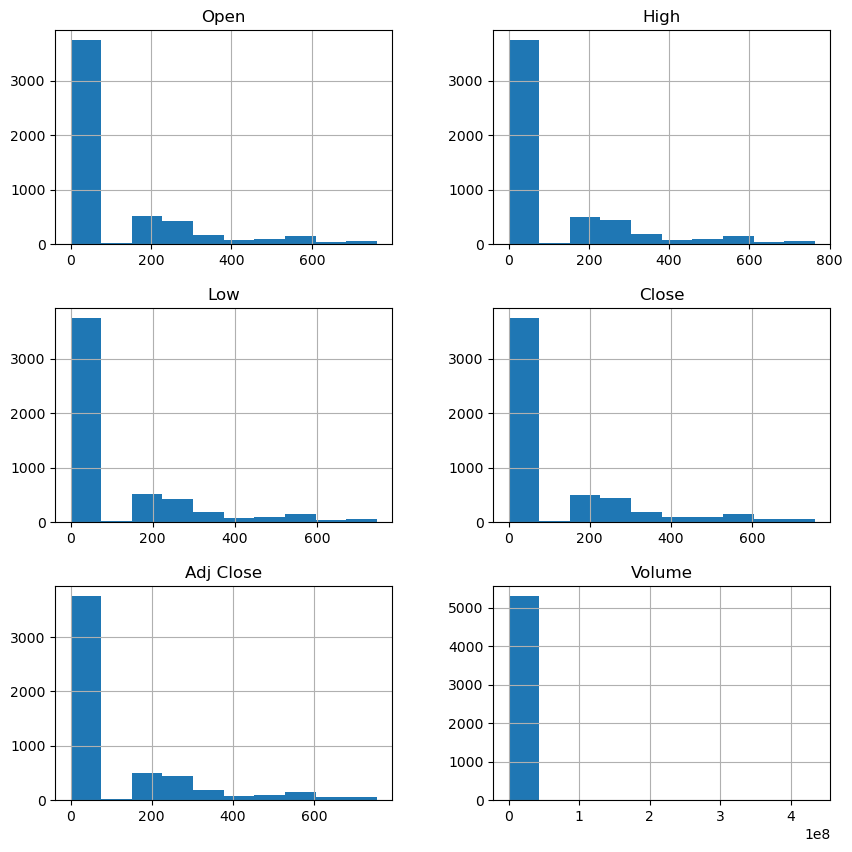

In [44]:
df_combined.hist(figsize=(10,10))

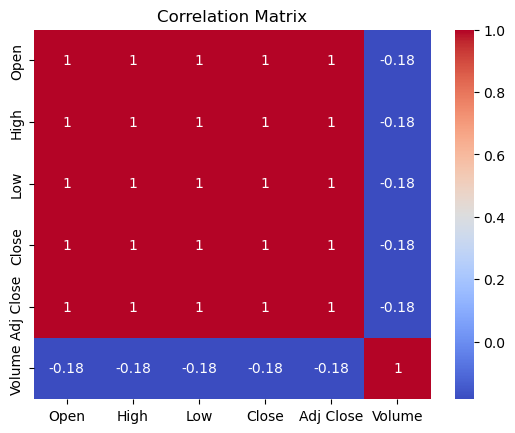

In [45]:
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#red is positive correlation and blue is negative. High positive correlation with adj close and close
#a negative correlation of -0.18 between "Open" and "Volume" may suggest that as the stock opens at a higher price, the volume of trading tends to decrease slightly

In [46]:
df_combined.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,18.440001,18.540001,18.280001,18.430000,17.351194,6169500
1,2017-01-04,19.020000,19.629999,18.940001,19.570000,18.424461,11142800
2,2017-01-05,19.459999,19.570000,19.049999,19.260000,18.132608,6169900
3,2017-01-06,19.150000,19.389999,19.120001,19.270000,18.142025,4631300
4,2017-01-09,18.950001,19.180000,18.830000,19.049999,17.934900,3670500


In [57]:
sivb_df = pd.read_csv('SIVB.csv')
sbny_df = pd.read_csv('SBNYP.csv')
cs_df = pd.read_csv('CS.csv')
db_df = pd.read_csv('DB.csv')

sivb_df['Bank'] = 'Silicon Valley Bank'
sbny_df['Bank'] = 'Signature Bank'
cs_df['Bank'] = 'Credit Suisse'
db_df['Bank'] = 'Deutsche Bank'

df_combined = pd.concat([sivb_df, sbny_df, cs_df, db_df], ignore_index=True)

In [58]:
df_combined.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Bank
0,2017-01-03,174.660004,176.774994,169.410004,172.119995,172.119995,488819,Silicon Valley Bank
1,2017-01-04,172.130005,179.380005,172.130005,178.979996,178.979996,597595,Silicon Valley Bank
2,2017-01-05,178.289993,179.970001,173.259995,175.169998,175.169998,601777,Silicon Valley Bank
3,2017-01-06,176.410004,179.350006,175.475006,177.520004,177.520004,401672,Silicon Valley Bank
4,2017-01-09,176.339996,176.339996,173.419998,174.330002,174.330002,495098,Silicon Valley Bank


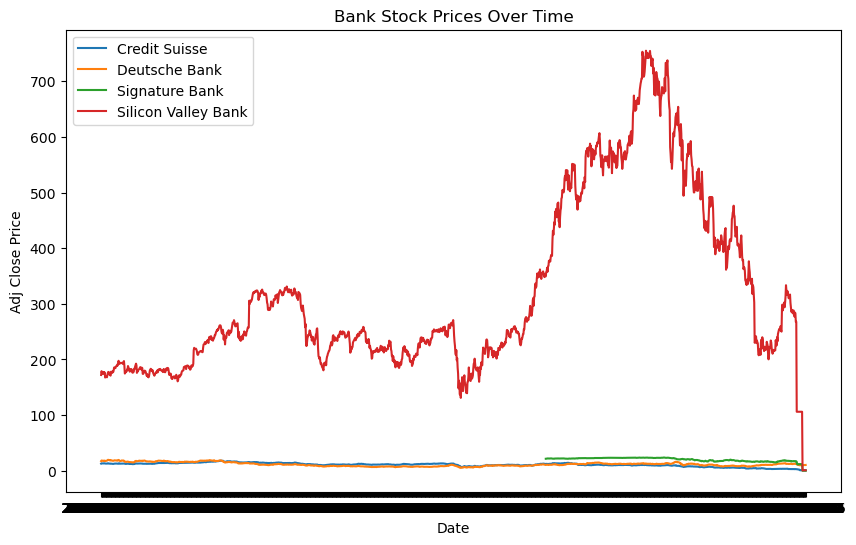

In [59]:
#adjusted close prices for each bank over time using a line chart
fig, ax = plt.subplots(figsize=(10,6))

for bank, df in df_combined.groupby('Bank'):
    ax.plot(df['Date'], df['Adj Close'], label=bank)

ax.set_xlabel('Date')
ax.set_ylabel('Adj Close Price')
ax.set_title('Bank Stock Prices Over Time')
ax.legend()
plt.show()

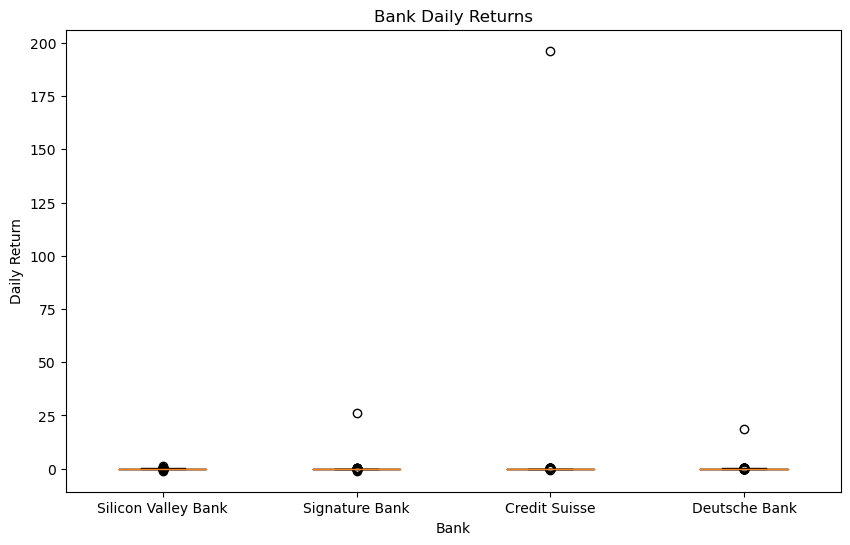

In [60]:
#Compare the daily returns of each bank using box plots
fig, ax = plt.subplots(figsize=(10,6))

df_combined['Daily Return'] = df_combined['Adj Close'].pct_change()
df_combined.dropna(inplace=True)

bp = ax.boxplot([df_combined[df_combined['Bank'] == bank]['Daily Return'] for bank in df_combined['Bank'].unique()], 
           labels=df_combined['Bank'].unique())

ax.set_xlabel('Bank')
ax.set_ylabel('Daily Return')
ax.set_title('Bank Daily Returns')
plt.show()

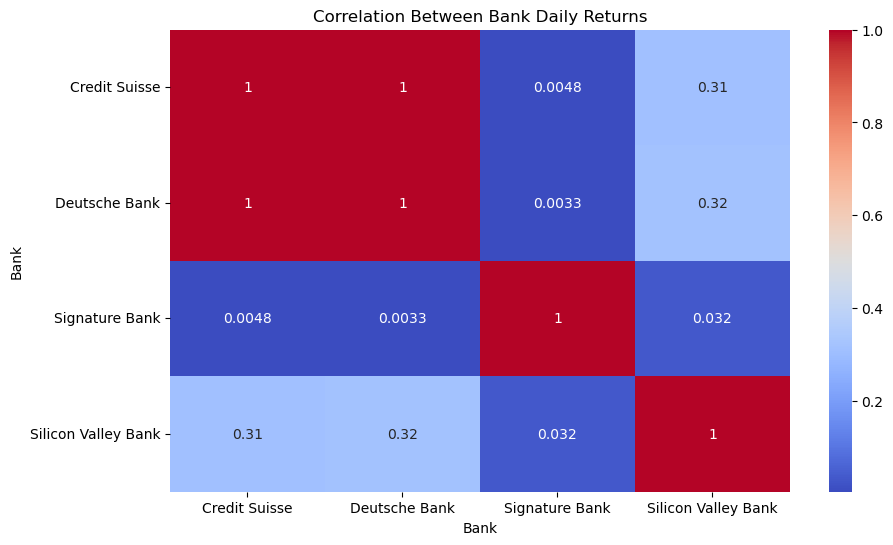

In [61]:
#Visualize the correlation between daily returns of the banks using a heatmap
corr = df_combined.pivot_table(index='Date', columns='Bank', values='Daily Return').corr()

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Between Bank Daily Returns')
plt.show()

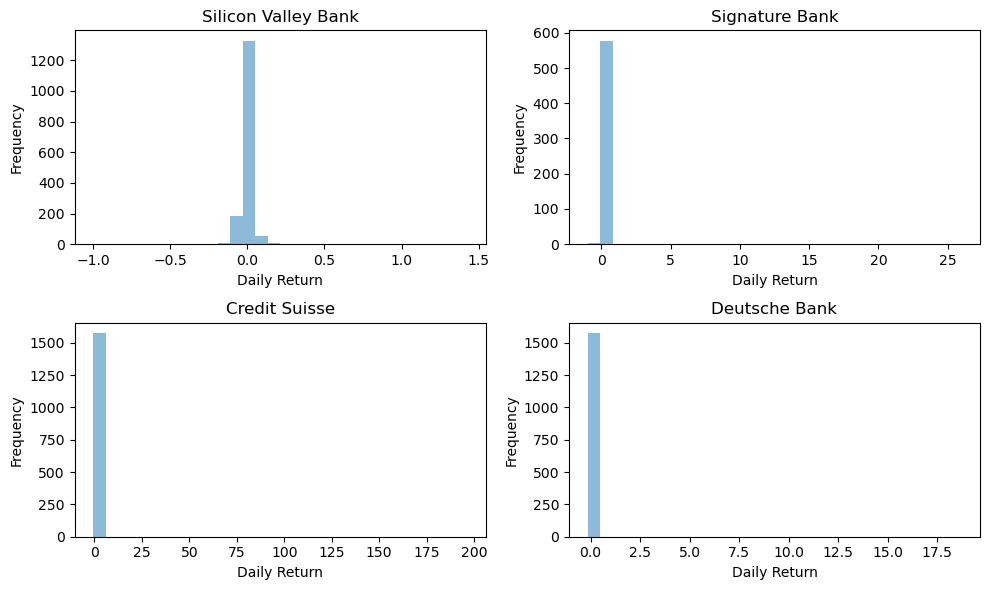

In [62]:
#distribution of daily returns for each bank using histograms
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

for bank, ax in zip(df_combined['Bank'].unique(), axs.flatten()):
    bank_df = df_combined[df_combined['Bank'] == bank]
    ax.hist(bank_df['Daily Return'], bins=30, alpha=0.5)
    ax.set_title(bank)
    ax.set_xlabel('Daily Return')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

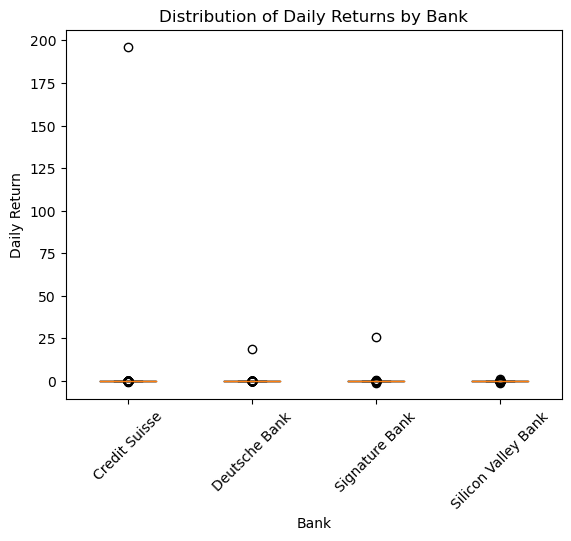

In [63]:
#Boxplot of daily returns 
grouped = df_combined.groupby('Bank')['Daily Return'].apply(list)
plt.boxplot(grouped)
plt.xticks(range(1, len(grouped)+1), grouped.index, rotation=45)
plt.xlabel('Bank')
plt.ylabel('Daily Return')
plt.title('Distribution of Daily Returns by Bank')
plt.show()

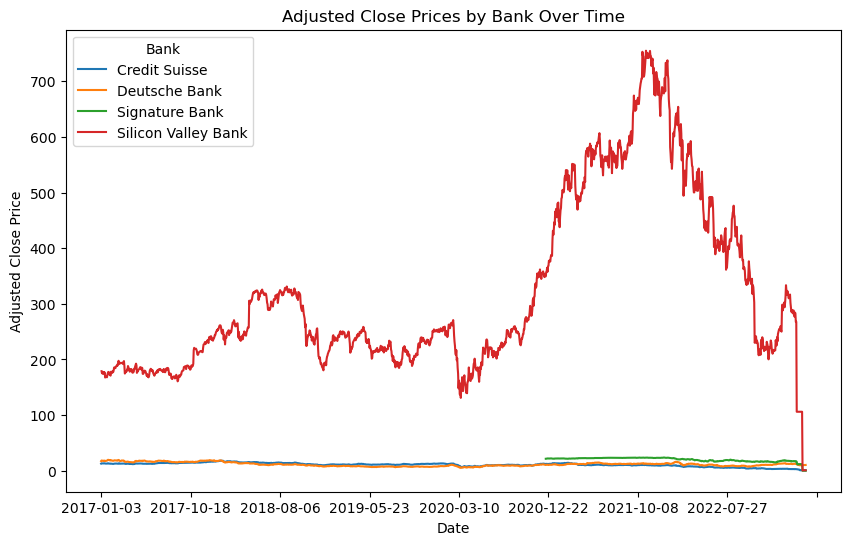

In [64]:
#Line chart of adjusted close prices by bank over time
pivot_df = df_combined.pivot(index='Date', columns='Bank', values='Adj Close')
pivot_df.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Prices by Bank Over Time')
plt.show()

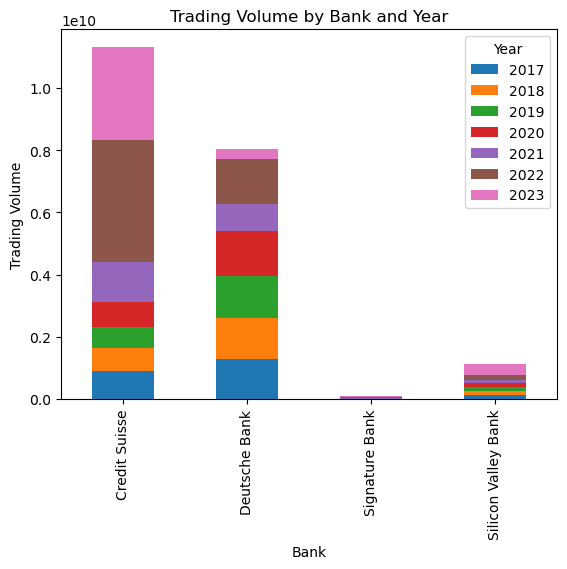

In [68]:
#Stacked bar chart of trading volume by bank and year
df_combined['Year'] = pd.to_datetime(df_combined['Date']).dt.year
grouped = df_combined.groupby(['Bank', 'Year'])['Volume'].sum().unstack()
grouped.plot(kind='bar', stacked=True)
plt.ylabel('Trading Volume')
plt.title('Trading Volume by Bank and Year')
plt.show()

In [74]:
df_combined['Return'] = df_combined.groupby('Bank')['Adj Close'].pct_change()
df_combined.groupby('Bank')['Return'].mean()


Bank
Credit Suisse         -0.001240
Deutsche Bank          0.000027
Signature Bank        -0.001618
Silicon Valley Bank    0.000477
Name: Return, dtype: float64

In [75]:
df_combined.groupby('Bank')['Return'].std()

Bank
Credit Suisse          0.028289
Deutsche Bank          0.026554
Signature Bank         0.048929
Silicon Valley Bank    0.055299
Name: Return, dtype: float64

In [76]:
df_combined.pivot_table(values='Return', index='Date', columns='Bank').corr()

Bank,Credit Suisse,Deutsche Bank,Signature Bank,Silicon Valley Bank
Bank,,,,
Credit Suisse,1.000000,0.588378,0.094334,0.307370
Deutsche Bank,0.588378,1.000000,0.117743,0.316029
Signature Bank,0.094334,0.117743,1.000000,0.705787
Silicon Valley Bank,0.307370,0.316029,0.705787,1.000000


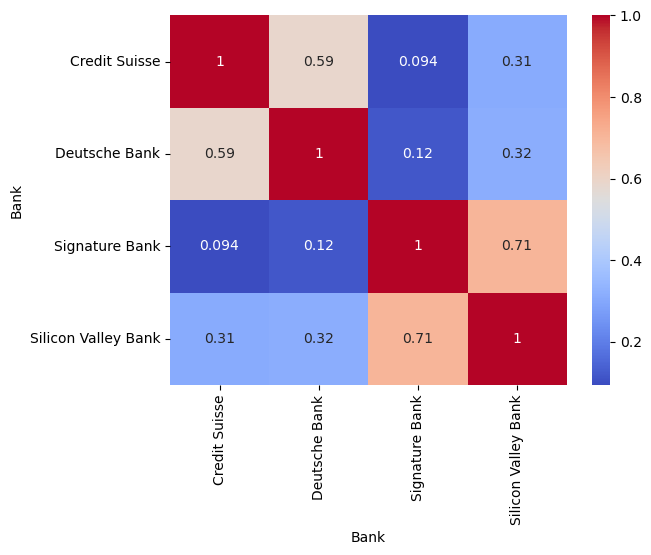

In [77]:
corr_matrix = df_combined.pivot_table(values='Return', index='Date', columns='Bank').corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
#we can see that Silicon Valley Bank and Signature Bank had the highest average returns, with Credit Suisse and Deutsche Bank having lower returns. However, it's important to note that past performance is not necessarily indicative
# we can see that there is a moderate positive correlation between Silicon Valley Bank and Signature Bank, which suggests that they may be influenced by similar market factors. On the other hand, Credit Suisse and Deutsche Bank have a weaker correlation with the other banks, indicating that their performance may be influenced by different factors.